# OCR Cookbook

---

## OCR Exploration and Structured Outputs
In this cookbook, we will explore the basics of OCR and leverage it together with existing models to achieve structured outputs fueled by our OCR model.

You may want to do this in case current vision models are not powerful enough, hence enhancing their vision OCR capabilities with the OCR model to achieve better structured data extraction.

---

### Used
- Mistral OCR
- Pixtral 12B & Ministral 8B


### Setup
First, let's install `mistralai` and download the required files.

In [2]:
!pip install mistralai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.3/278.3 kB 6.6 MB/s eta 0:00:00


In [5]:
!wget https://raw.githubusercontent.com/mistralai/cookbook/refs/heads/main/mistral/ocr/mistral7b.pdf
!wget https://raw.githubusercontent.com/mistralai/cookbook/refs/heads/main/mistral/ocr/receipt.png

--2025-03-08 16:53:34--  https://app.luminpdf.com/viewer/67cc75f464fe0baa5c8f2f71
Resolving app.luminpdf.com (app.luminpdf.com)... 104.22.73.193, 104.22.72.193, 172.67.36.115, ...
Connecting to app.luminpdf.com (app.luminpdf.com)|104.22.73.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘67cc75f464fe0baa5c8f2f71’

67cc75f464fe0baa5c8     [ <=>                ]   5.08K  --.-KB/s    in 0s      

2025-03-08 16:53:34 (40.0 MB/s) - ‘67cc75f464fe0baa5c8f2f71’ saved [5197]



We can now set up our client. You can create an API key on our [Plateforme](https://console.mistral.ai/api-keys/).

In [3]:
from mistralai import Mistral

api_key = "4ASRjRXvok3uVYbHSMfFP0HiiH9WqAws"
client = Mistral(api_key=api_key)

There are two types of files you can apply OCR to:
- PDF files, either uploaded or from URLs...

In [33]:
from google.colab import files

# Upload a file
uploaded = files.upload()

# Check if the file was uploaded
for filename in uploaded.keys():
    print(f'Uploaded file: {filename}')

Saving AI Agent Infra.jpeg to AI Agent Infra.jpeg
Uploaded file: AI Agent Infra.jpeg


In [20]:
from pathlib import Path

pdf_file = Path("test_ocr_image.jpeg")
assert pdf_file.is_file()

In [21]:
from mistralai import DocumentURLChunk, ImageURLChunk, TextChunk
import json

uploaded_file = client.files.upload(
    file={
        "file_name": pdf_file.stem,
        "content": pdf_file.read_bytes(),
    },
    purpose="ocr",
)

signed_url = client.files.get_signed_url(file_id=uploaded_file.id, expiry=1)

pdf_response = client.ocr.process(document=DocumentURLChunk(document_url=signed_url.url), model="mistral-ocr-latest", include_image_base64=True)

response_dict = json.loads(pdf_response.json())
json_string = json.dumps(response_dict, indent=4)
print(json_string)

SDKError: API error occurred: Status 400
{"object":"error","message":"Invalid document type. image/jpeg is not supported.","type":"invalid_file","param":null,"code":"1901"}

*The OCR model can output interleaved text and images (set `include_image_base64=True` to return the base64 image ), we can view the result with the following:*

# How I use to boost productivity 

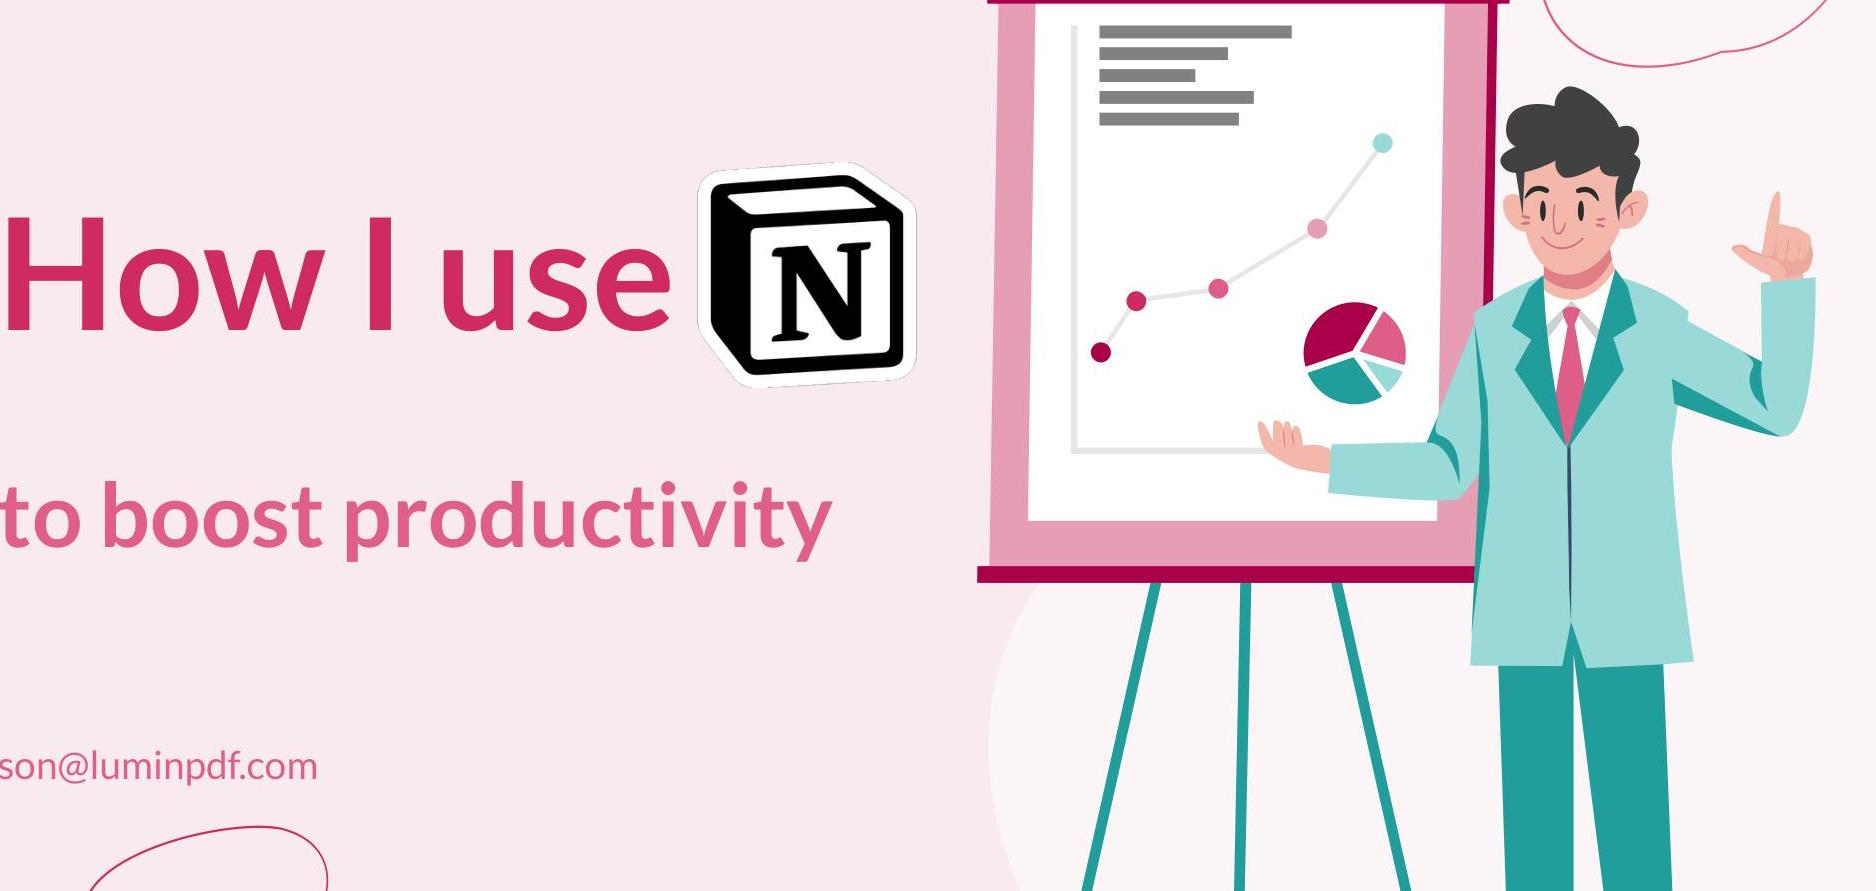

# Table of contents 

01

## Introduction

About my "Productivity Framework"

04
Learning/Reading/
Watching
You can describe the topic of the section here

02

Daily Tasks
You can describe the topic of the section here

05

Personal Finance
You can describe the topic of the section here

## 03

Yearly Goals
You can describe the topic of the section here

06

## Team Management

You can describe the topic of the section here

# 01 

## Introduction

About my "Productivity Framework"

# Distraction 

is the \#1 productivity killer, IMO.

## Sources of Distraction

- Noise
- Notifications
- Too many tasks
- etc
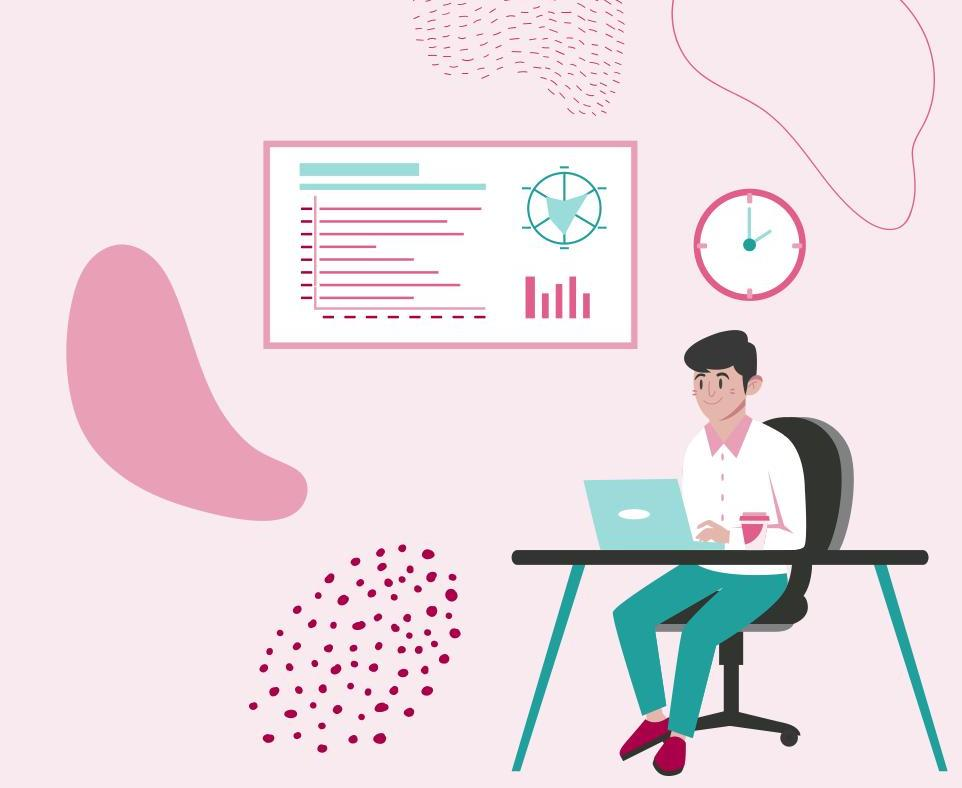

# Distraction Source \#1: Noise 

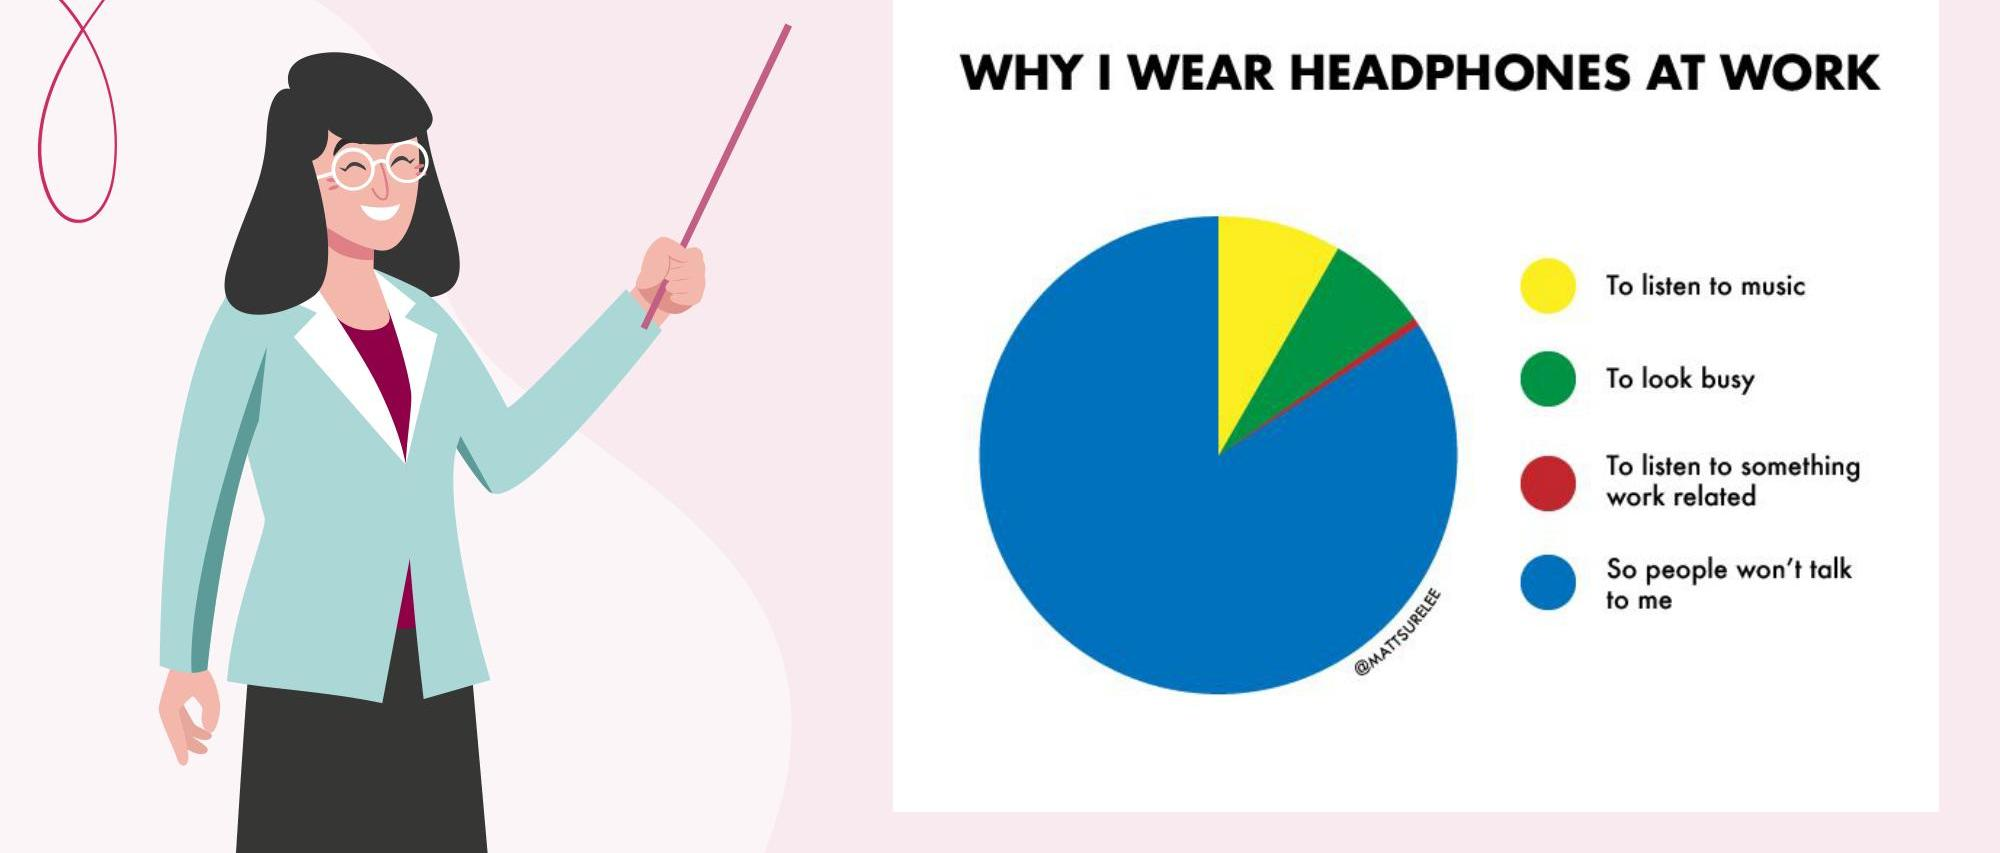

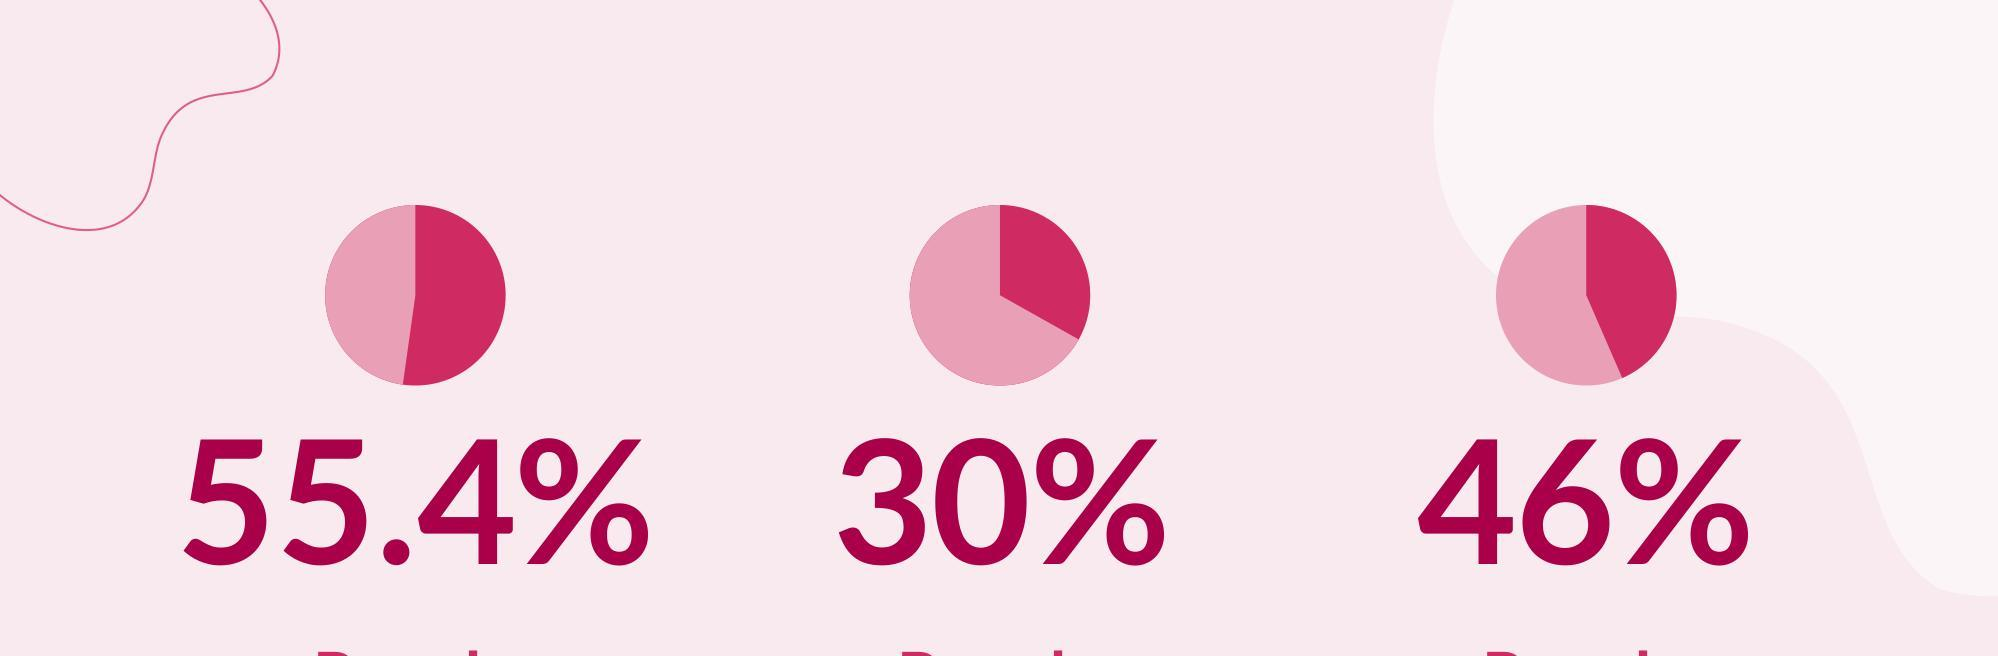

# Distraction Source \#2: Notifications 

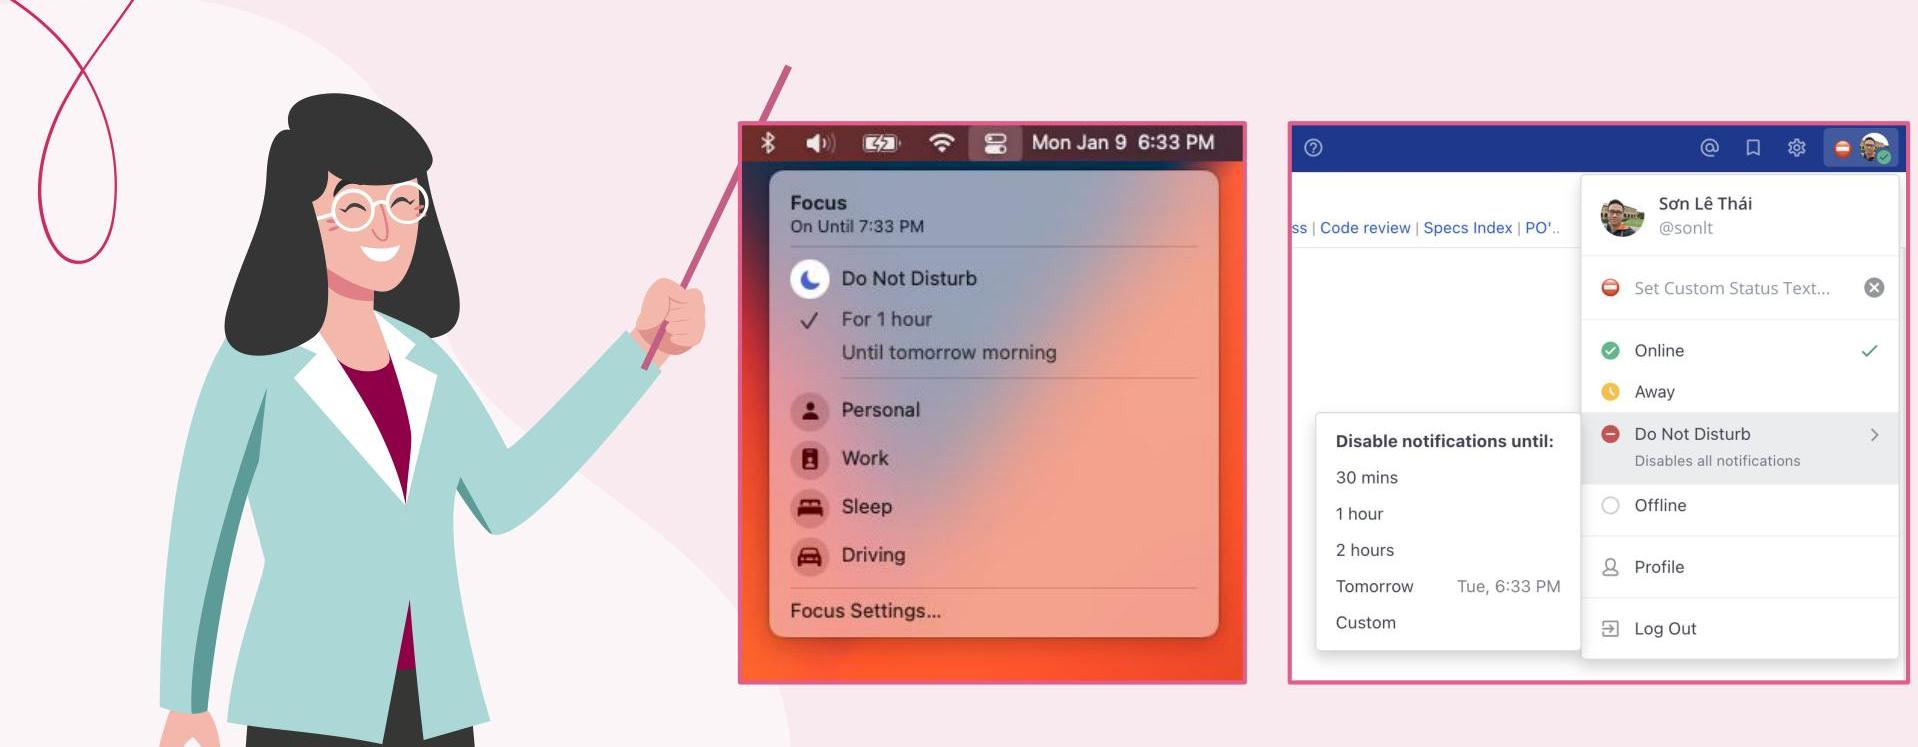

# Distraction Source \#3: Too many tasks 

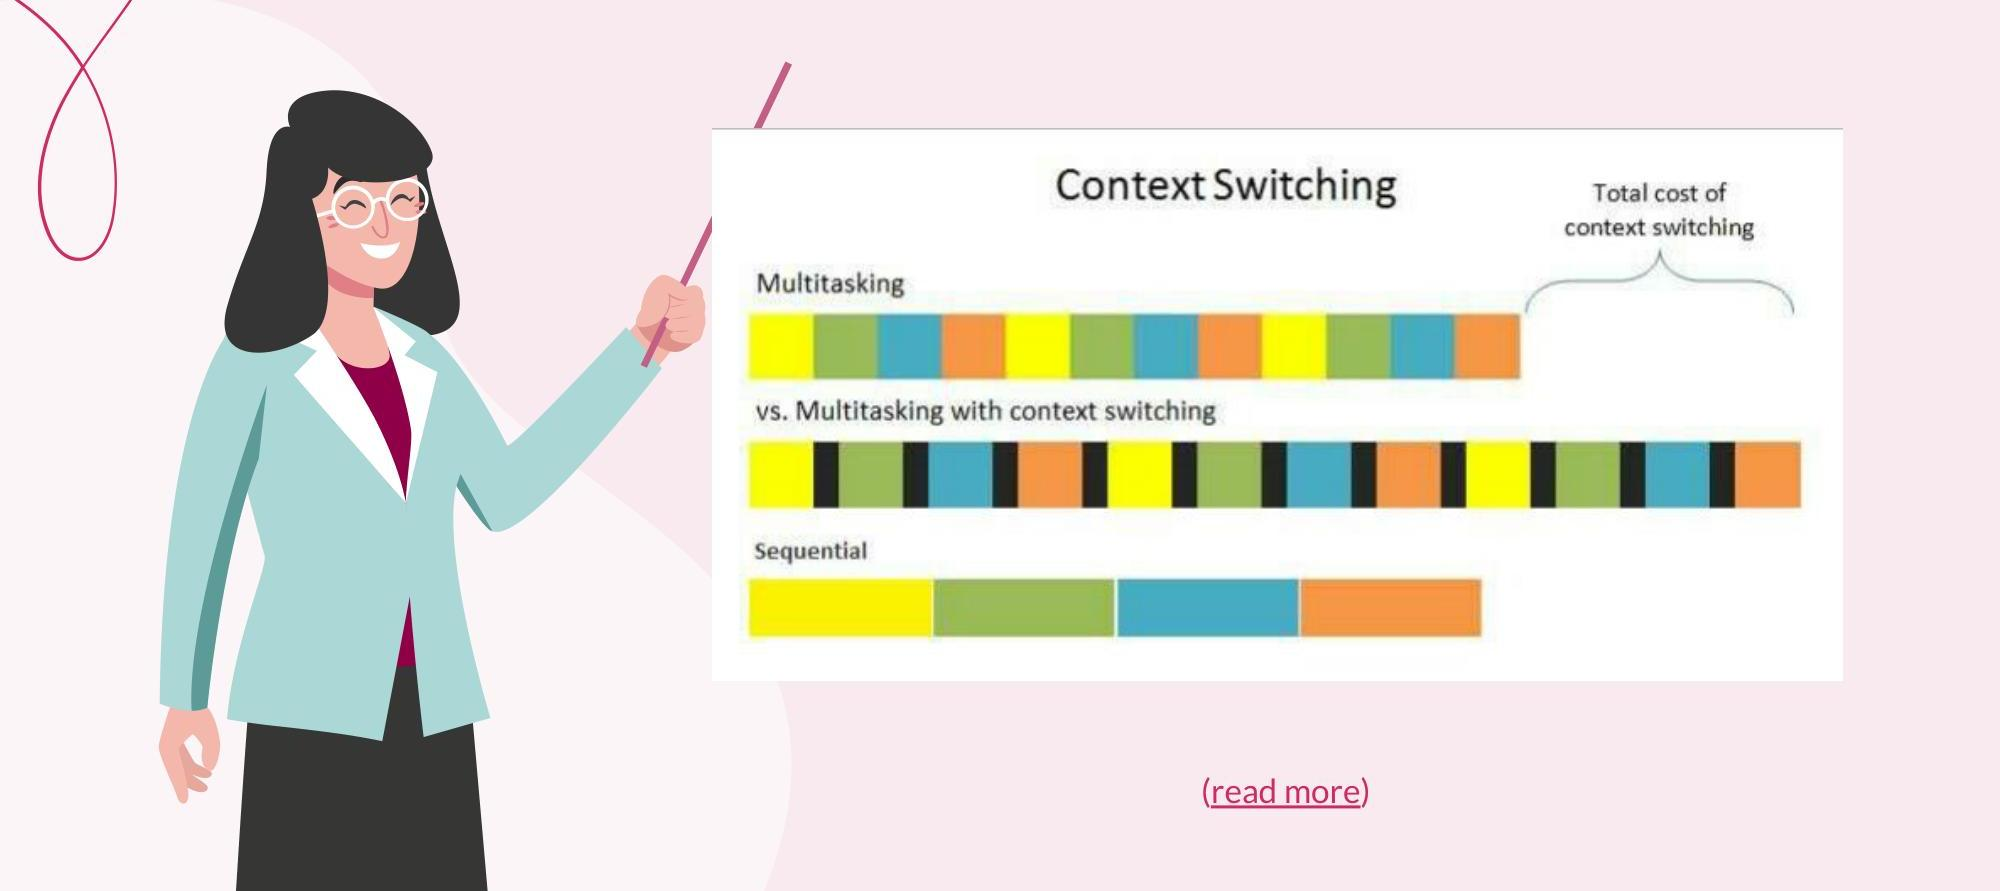

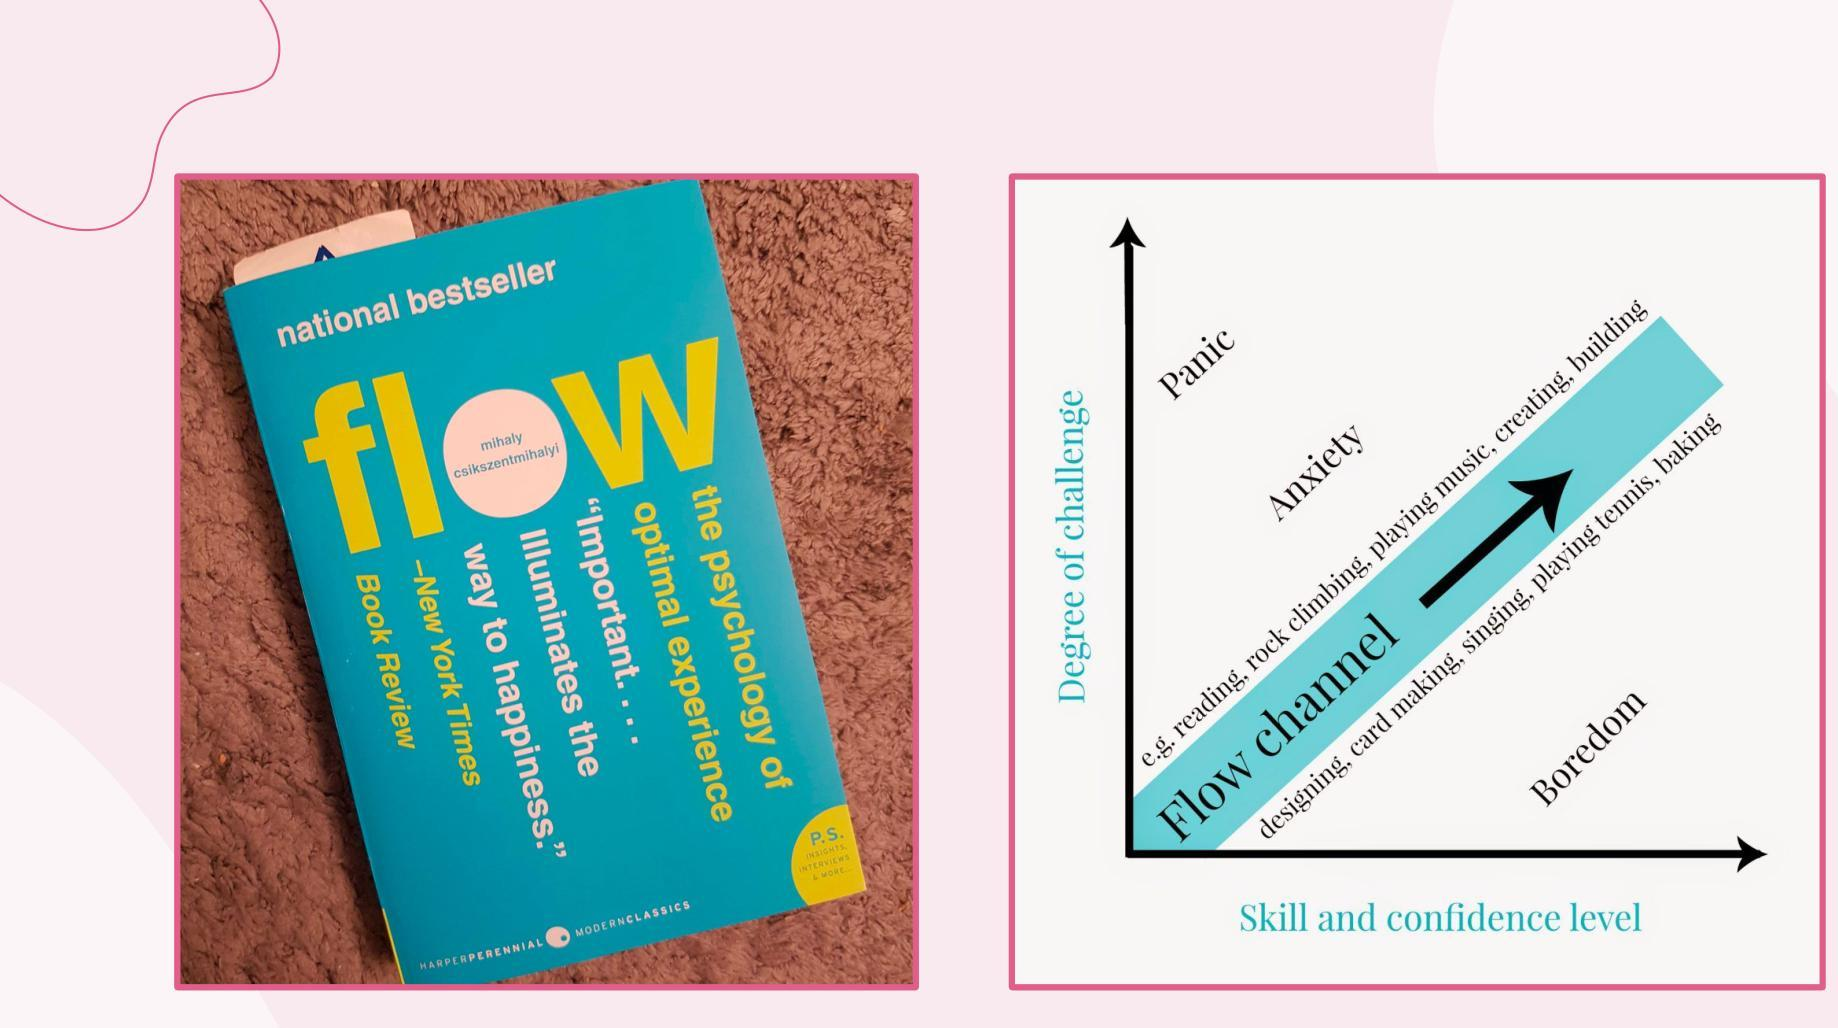

# Solution for: Too many tasks 

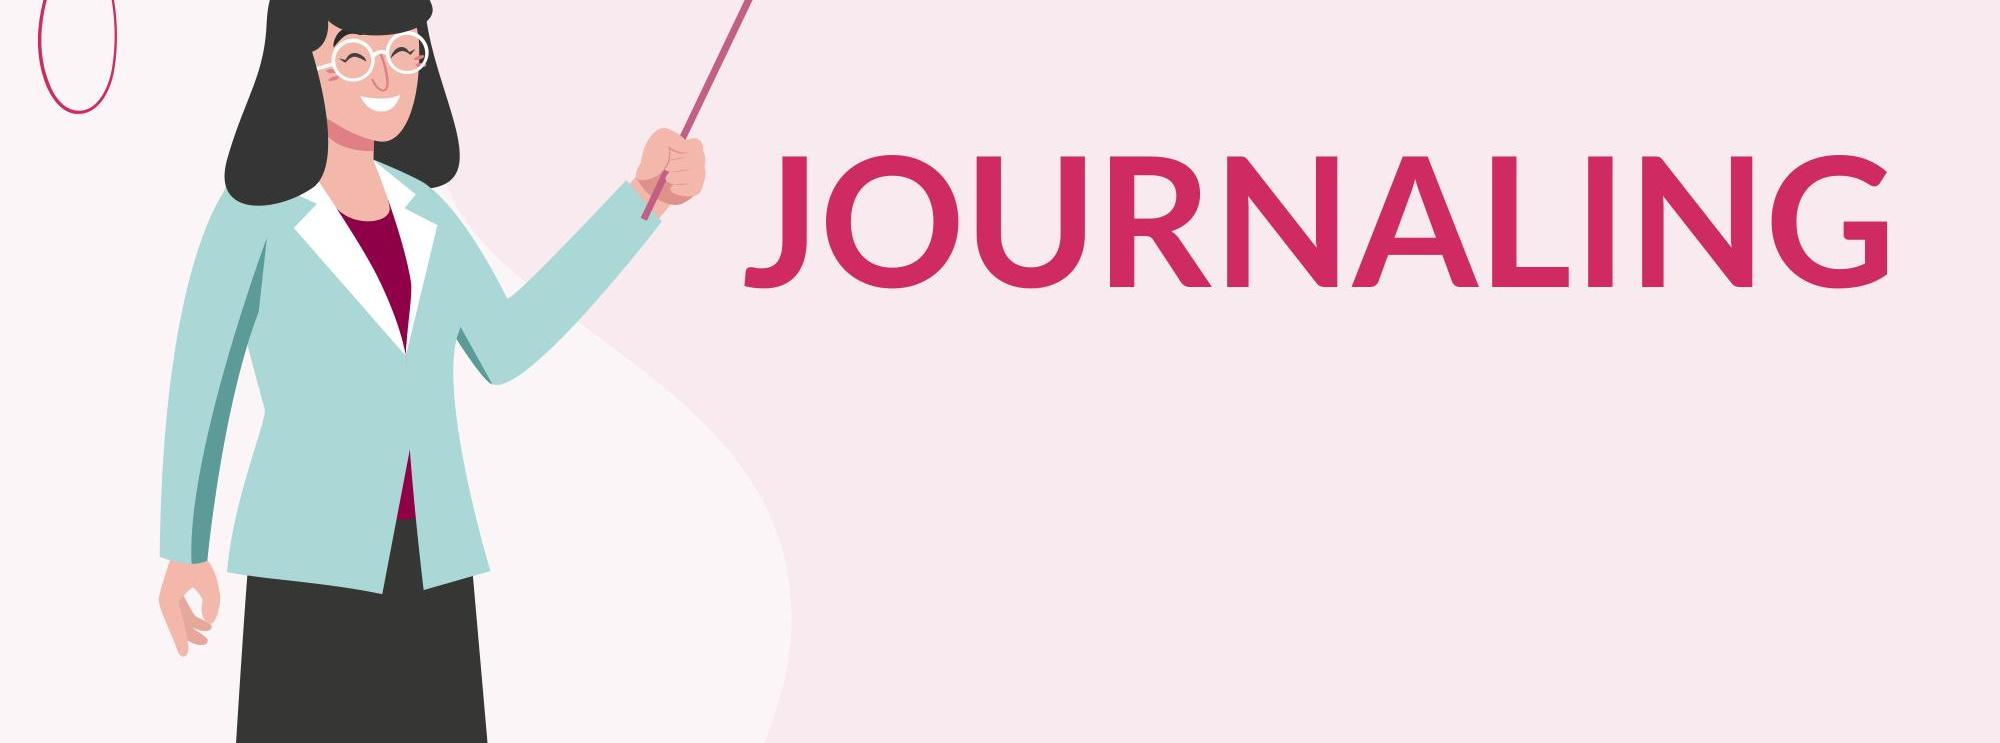

# My Productivity Framework 

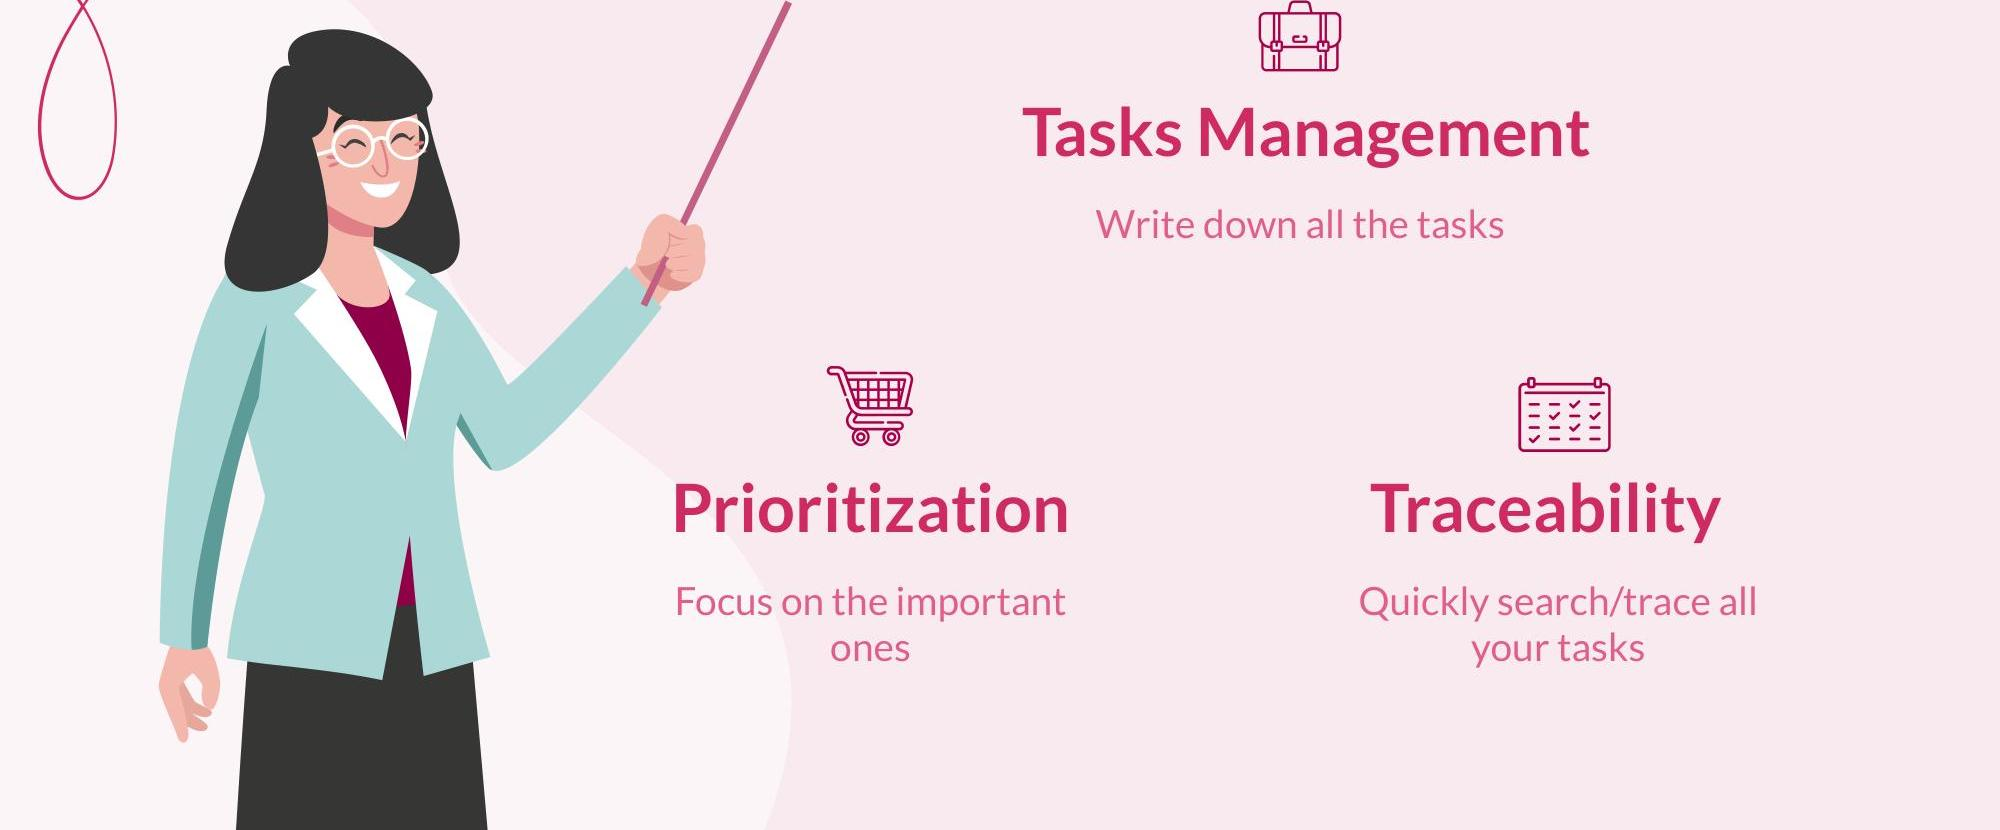

# How I started journaling 

## Apple Notes

2016-2017
(basic notes)
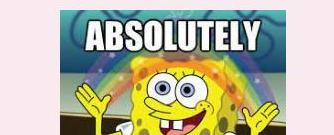

## ㄷ

## ㄱ

## ㄴ

## ㄷ

## ㄴ

## ㄷ

## ㄴ

## None

Before 2016
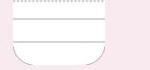

## OneNote

2018-2021
(journaling-
structured notes)

# 02 

## Daily Tasks

You can enter a subtitle here if you need it

# DEMO 

You can check it out here

# The Eisenhower Matrix 

## Urgent

## O DO IT

Things with clear deadlines and consequences for not taking immediate action.

## Examples

- Finishing a client project
- Submitting a draft article
- Responding to some emails
- Picking up your sick kid from school


## DEDEGATE IT

Things that need to be done, but don't require your specific skills. Busy work.

## Examples

- Uploading blog posts
- Scheduling
- Responding to some emails
- Meal prep


## Not Urgent

## (c) SCIRENVE IT

Activities without a set deadline that bring you closer to your goals. Easy to procrastinate on.

## Examples

- Strategic planning
- Professional development
- Networking
- Exercise


## (i) DELETE IT

Distractions that make you feel worse afterward. Can be okay but only in moderation.

## Examples

- Social media
- Watching TV
- Video games
- Eating junk food

# Daily Tasks - What we've covered 

- Prioritization - using Eisenhower matrix
- Quickly access a page using Favorites
- Traceability - quickly search for any random content
- Jump to a specific date
- Quickly create new pages from a template
- Etc

# 03 

## Yearly Targets

You can enter a subtitle here if you need it

# DEMO 

You can check it out here

# Yearly Targets - What we've covered 

- Annual Review \& Reset
- Set \& track targets using the OKR framework
- Etc

# 04 

## Manage <br> Learning/Books/Reading/ Watching

# DEMO 

Big numbers catch your audience's attention

# 05 

## Personal Finance

You can enter a subtitle here if you need it

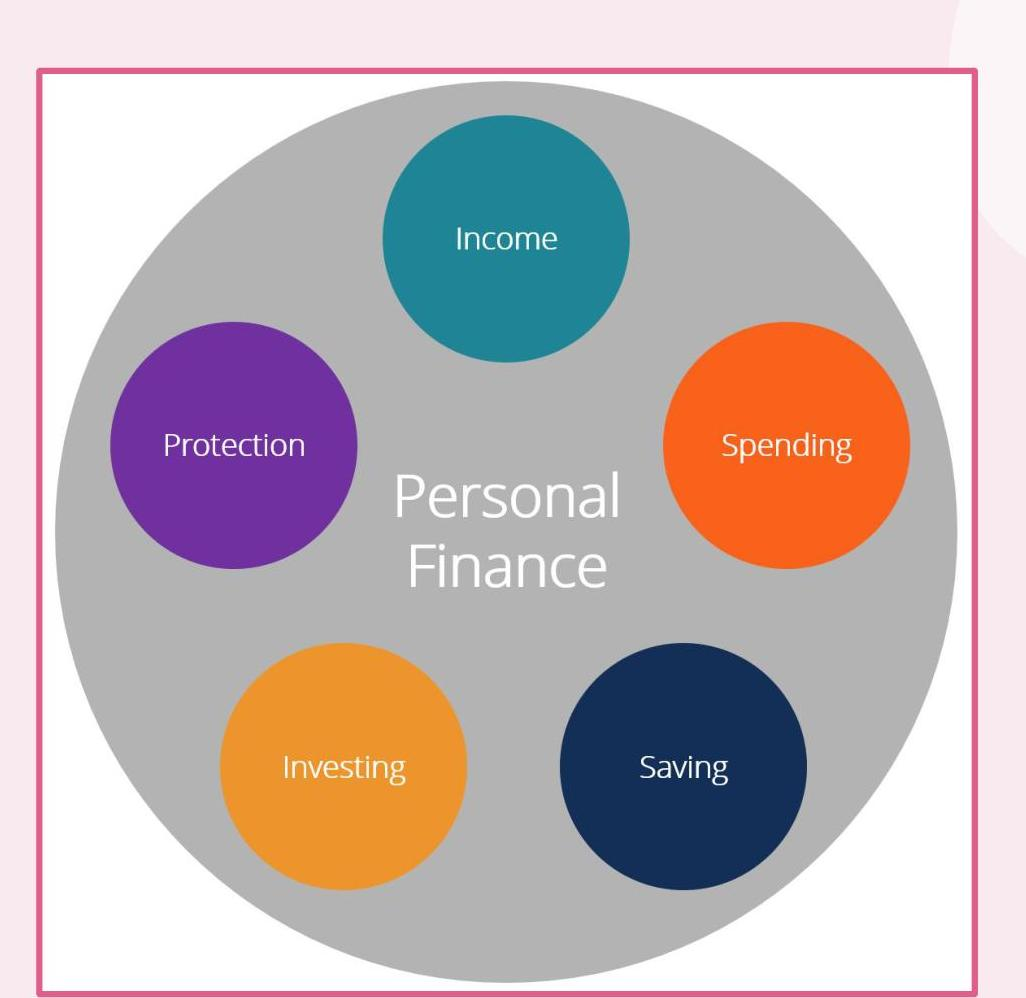

# DEMO 

You can check it out here

# Personal Finance - What we've covered 

- Dashboard using widgets
- Income tracking
- Investing/Loan/Debt tracking
- Subscriptions tracking
- Etc

# 06 

## Team Management

You can enter a subtitle here if you need it

# DEMO 

Big numbers catch your audience's attention

# Team Mgt - What we've covered 

- Operations Team
- Track issues (similar to Trello)
- Manage members, team structure
- Levels
- Allocation
- Handbook
- Onboarding
- Policies
- Guidelines
- Squads' documents
- Meeting notes

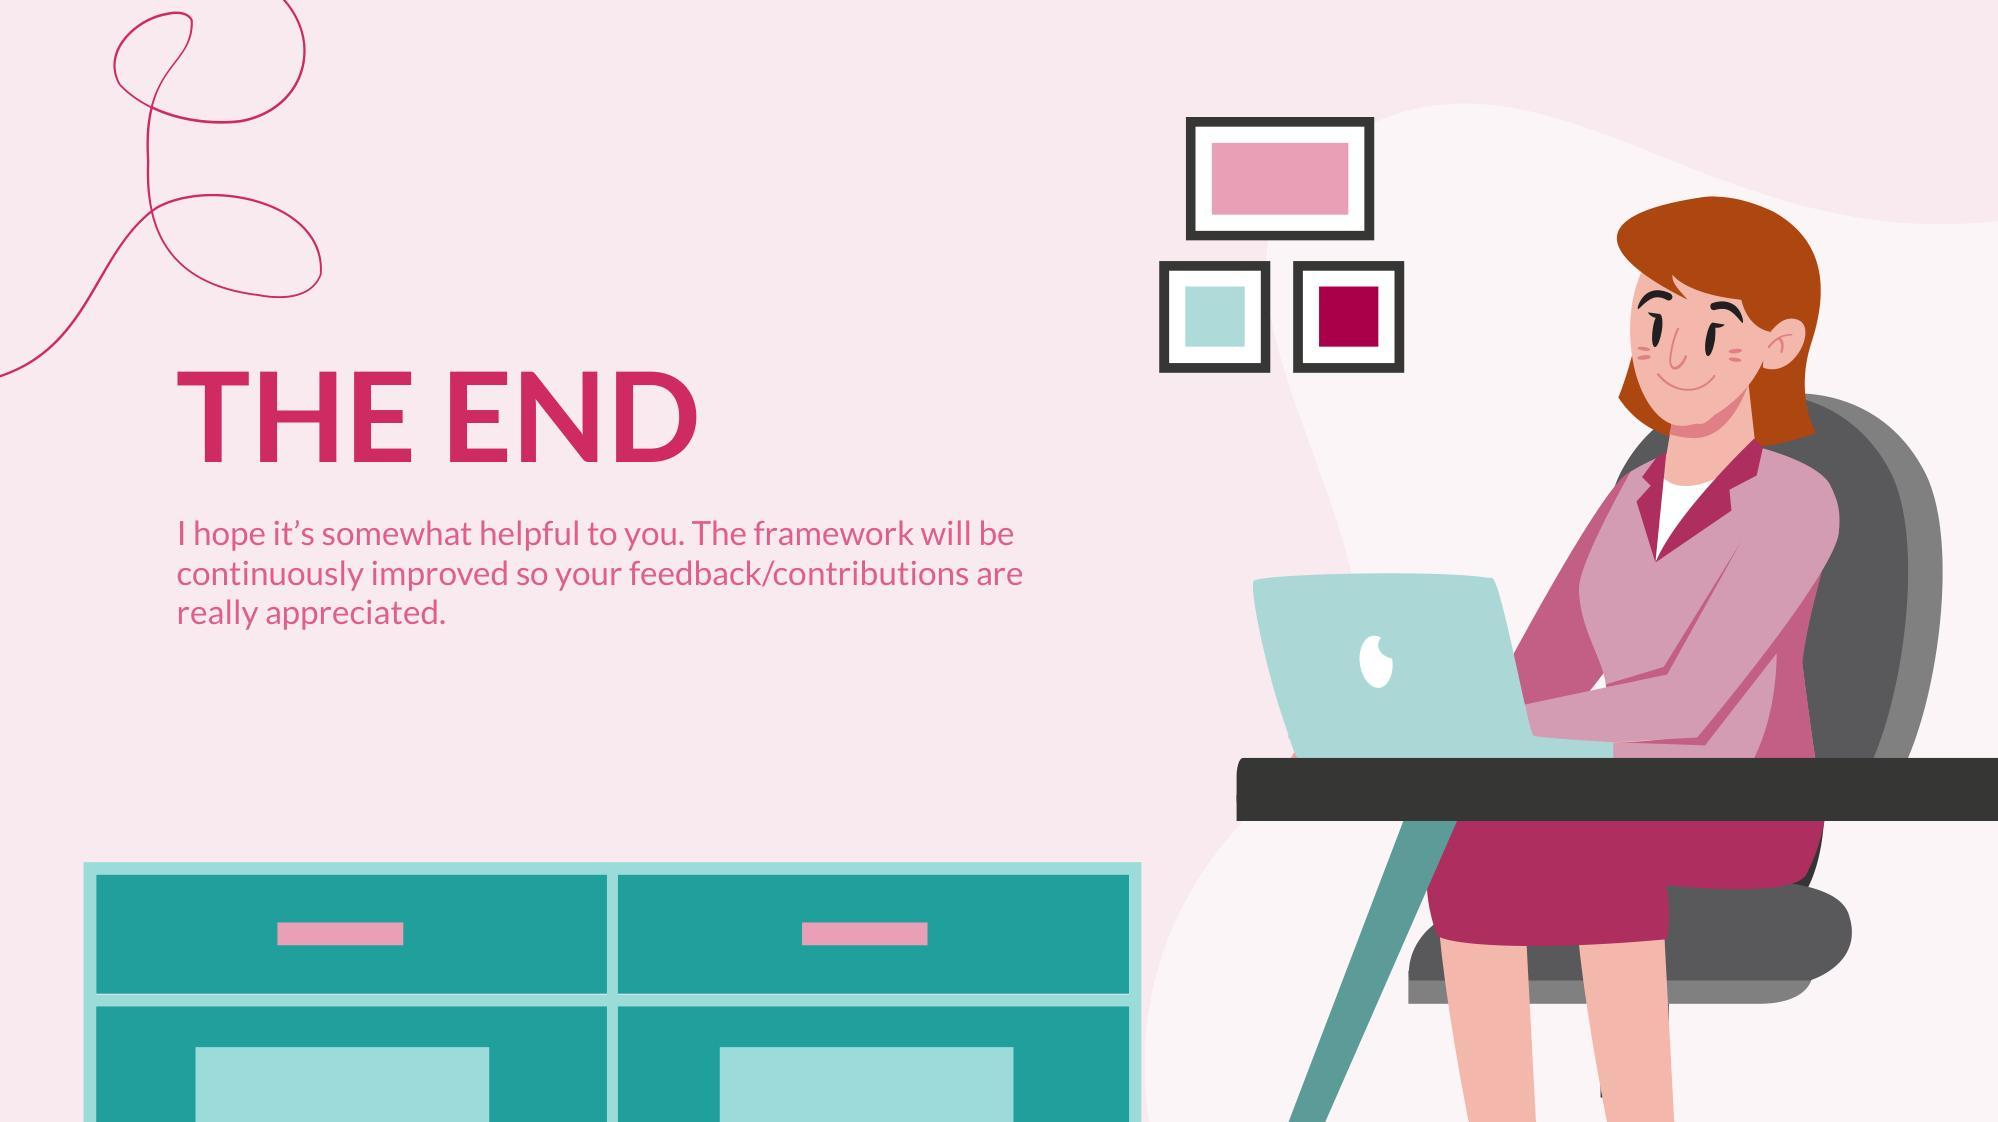

# Thanks! 

Do you have any questions?
son@luminpdf.com
+34654321432
thaison.dev
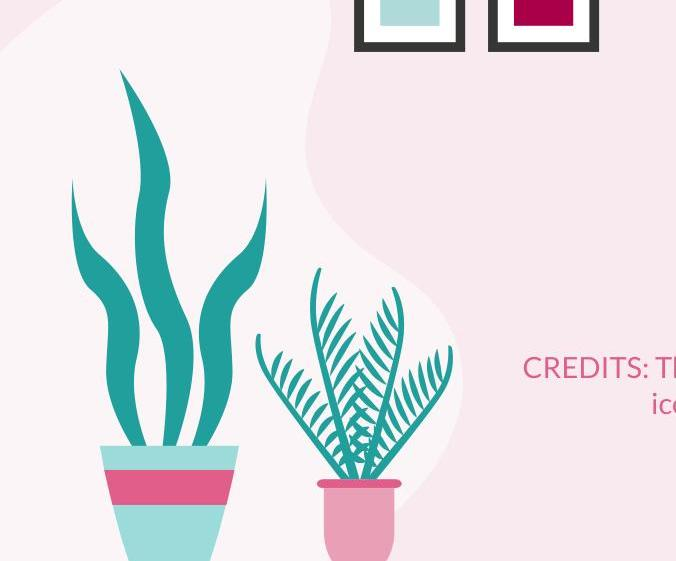

Please keep this slide for attribution
CREDITS: This presentation template was created by Slidesgo, and includes icons by Flaticon, and infographics \& images by Freepik

In [17]:
from mistralai.models import OCRResponse
from IPython.display import Markdown, display

def replace_images_in_markdown(markdown_str: str, images_dict: dict) -> str:
    for img_name, base64_str in images_dict.items():
        markdown_str = markdown_str.replace(f"![{img_name}]({img_name})", f"![{img_name}]({base64_str})")
    return markdown_str

def get_combined_markdown(ocr_response: OCRResponse) -> str:
  markdowns: list[str] = []
  for page in pdf_response.pages:
    image_data = {}
    for img in page.images:
      image_data[img.id] = img.image_base64
    markdowns.append(replace_images_in_markdown(page.markdown, image_data))

  return "\n\n".join(markdowns)

display(Markdown(get_combined_markdown(pdf_response)))

- And Image files...

In [34]:
image_file = Path("AI Agent Infra.jpeg")
assert image_file.is_file()

In [35]:
import base64

encoded = base64.b64encode(image_file.read_bytes()).decode()
base64_data_url = f"data:image/jpeg;base64,{encoded}"

image_response = client.ocr.process(document=ImageURLChunk(image_url=base64_data_url), model="mistral-ocr-latest")

response_dict = json.loads(image_response.model_dump_json())
json_string = json.dumps(response_dict, indent=4)
print(json_string)

{
    "pages": [
        {
            "index": 0,
            "markdown": "# Complex Infrastructure of AI Agents \n\n## AI Agents\n\nbolt glean (SSIERRA\nCOGNIGY Harvey Devin AI\n\n## Front-end\n\nW Streamlit Flask (g) gradio node NEXT.\n\nMemory\n(3) zep (M) Memo coqnee (c) Letta\nAuthentication\n(1) Auth0 (1) akta \u56ed OpenFGX (2) ANON\n\nTools\n(3) Google (1) Duckduckgo $\\square$ Serper $\\mathbb{R}$ exa\nAgentic Observability\nA arize (1) LangSmith Langfuse (1) helicone\n(3) Galien $\\square$ epik (c) Metoro @Braintrust\n\nAgent Orchestration\n(1) LangGraph \u56ed Autogen (c) tifaf \u56ed Hezystack\n\nLamenies phidata Swarff AW5 Multi-agent Orchestrator\nModel Routing\n(3) martian $\\boldsymbol{\\sim}$ OpenRouter $\\rightarrow$ not diamond\n\nFoundational Models\n(3) OpenAI (3) deepasek Genini (3) Qwen\n\n- Claude 1401\n- Grak (c) Llama\nETL(Extract, Load, Transform)\nDATAVOLO (3) Needle (3) verodat\nDatabase\nChzoma (1) drant 4 supabase (1) Pinecone\n(1) mowide (m) mognito (ne

We want to be able to extract structured data from these files. For this, we will make use of `pixtral-12b-latest` and support it with our OCR model for better, high-quality answers.

In [36]:
image_ocr_markdown = image_response.pages[0].markdown

chat_response = client.chat.complete(
    model="pixtral-12b-latest",
    messages=[
        {
            "role": "user",
            "content": [
                ImageURLChunk(image_url=base64_data_url),
                TextChunk(text=f"This is image's OCR in markdown:\n<BEGIN_IMAGE_OCR>\n{image_ocr_markdown}\n<END_IMAGE_OCR>.\nConvert this into a sensible structured json response. The output should be strictly be json with no extra commentary")
            ],
        },
    ],
    response_format =  {"type": "json_object"},
    temperature=0
)

response_dict = json.loads(chat_response.choices[0].message.content)
json_string = json.dumps(response_dict, indent=4)
print(json_string)

{
    "infrastructure": {
        "ai_agents": [
            "bolt",
            "glean",
            "SIERRA",
            "COGNIGY",
            "Harvey",
            "Devin AI"
        ],
        "front_end": [
            "Streamlit",
            "Flask",
            "gradio",
            "node",
            "NEXT"
        ],
        "memory": [
            "zep",
            "Memo",
            "coqnee",
            "Letta"
        ],
        "authentication": [
            "Auth0",
            "akta",
            "OpenFGX",
            "ANON"
        ],
        "tools": [
            "Google",
            "Duckduckgo",
            "Serper",
            "exa"
        ],
        "agentic_observability": [
            "arize",
            "LangSmith",
            "Langfuse",
            "helicone",
            "Galien",
            "epik",
            "Metoro",
            "Braintrust"
        ],
        "agent_orchestration": [
            "LangGraph",
            "Autogen",
      

Note: We are leveraging a model already capable of vision tasks. However, we could also use text-only models for the structured output.

In [25]:
image_ocr_markdown = image_response.pages[0].markdown

chat_response = client.chat.complete(
    model="ministral-8b-latest",
    messages=[
        {
            "role": "user",
            "content": f"This is image's OCR in markdown:\n<BEGIN_IMAGE_OCR>\n{image_ocr_markdown}\n<END_IMAGE_OCR>.\nConvert this into a sensible structured json response. The output should be strictly be json with no extra commentary"
        },
    ],
    response_format =  {"type": "json_object"},
    temperature=0
)

response_dict = json.loads(chat_response.choices[0].message.content)
json_string = json.dumps(response_dict, indent=4)
print(json_string)

{
    "image": "img-0.jpeg"
}


### All Together
Let's design a simple function that takes an `image_path` file and returns a JSON structured output in a specific format. In this case, we arbitrarily decided we wanted an output respecting the following:

```python
class StructuredOCR:
    file_name: str  # can be any string
    topics: list[str]  # must be a list of strings
    languages: list[Language]  # a list of languages
    ocr_contents: dict  # any dictionary, can be freely defined by the model
```

We will make use of [custom structured outputs](https://docs.mistral.ai/capabilities/structured-output/custom_structured_output/) as well as `pycountry` for the languages.

In [26]:
!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 33.0 MB/s eta 0:00:00


In [27]:
from enum import Enum
from pathlib import Path
from pydantic import BaseModel
import base64
import pycountry

languages = {lang.alpha_2: lang.name for lang in pycountry.languages if hasattr(lang, 'alpha_2')}

class LanguageMeta(Enum.__class__):
    def __new__(metacls, cls, bases, classdict):
        for code, name in languages.items():
            classdict[name.upper().replace(' ', '_')] = name
        return super().__new__(metacls, cls, bases, classdict)

class Language(Enum, metaclass=LanguageMeta):
    pass

class StructuredOCR(BaseModel):
    file_name: str
    topics: list[str]
    languages: list[Language]
    ocr_contents: dict

print(StructuredOCR.schema_json())

def structured_ocr(image_path: str) -> StructuredOCR:
    image_file = Path(image_path)
    assert image_file.is_file(), "The provided image path does not exist."

    # Read and encode the image file
    encoded_image = base64.b64encode(image_file.read_bytes()).decode()
    base64_data_url = f"data:image/jpeg;base64,{encoded_image}"

    # Process the image using OCR
    image_response = client.ocr.process(document=ImageURLChunk(image_url=base64_data_url), model="mistral-ocr-latest")
    image_ocr_markdown = image_response.pages[0].markdown

    # Parse the OCR result into a structured JSON response
    chat_response = client.chat.parse(
        model="pixtral-12b-latest",
        messages=[
            {
                "role": "user",
                "content": [
                    ImageURLChunk(image_url=base64_data_url),
                    TextChunk(text=(
                        "This is the image's OCR in markdown:\n"
                        f"<BEGIN_IMAGE_OCR>\n{image_ocr_markdown}\n<END_IMAGE_OCR>.\n"
                        "Convert this into a structured JSON response with the OCR contents in a sensible dictionnary."
                    ))
                ],
            },
        ],
        response_format=StructuredOCR,
        temperature=0
    )

    return chat_response.choices[0].message.parsed

{"$defs": {"Language": {"enum": ["Afar", "Abkhazian", "Afrikaans", "Akan", "Amharic", "Arabic", "Aragonese", "Assamese", "Avaric", "Avestan", "Aymara", "Azerbaijani", "Bashkir", "Bambara", "Belarusian", "Bengali", "Bislama", "Tibetan", "Bosnian", "Breton", "Bulgarian", "Catalan", "Czech", "Chamorro", "Chechen", "Church Slavic", "Chuvash", "Cornish", "Corsican", "Cree", "Welsh", "Danish", "German", "Dhivehi", "Dzongkha", "Modern Greek (1453-)", "English", "Esperanto", "Estonian", "Basque", "Ewe", "Faroese", "Persian", "Fijian", "Finnish", "French", "Western Frisian", "Fulah", "Scottish Gaelic", "Irish", "Galician", "Manx", "Guarani", "Gujarati", "Haitian", "Hausa", "Serbo-Croatian", "Hebrew", "Herero", "Hindi", "Hiri Motu", "Croatian", "Hungarian", "Armenian", "Igbo", "Ido", "Sichuan Yi", "Inuktitut", "Interlingue", "Interlingua (International Auxiliary Language Association)", "Indonesian", "Inupiaq", "Icelandic", "Italian", "Javanese", "Japanese", "Kalaallisut", "Kannada", "Kashmiri", 

<ipython-input-27-6d2a870d5cb5>:24: PydanticDeprecatedSince20: The `schema_json` method is deprecated; use `model_json_schema` and json.dumps instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  print(StructuredOCR.schema_json())


We can now extract structured output from any image parsed with our OCR model.

In [31]:
image_path = "test_ocr_image.jpeg"
structured_response = structured_ocr(image_path)

response_dict = json.loads(structured_response.model_dump_json())
json_string = json.dumps(response_dict, indent=4)
print(json_string)

{
    "file_name": "img-0.jpeg",
    "topics": [
        "OCR",
        "image processing",
        "markdown"
    ],
    "languages": [
        "English"
    ],
    "ocr_contents": {
        "text": "This is the image's OCR in markdown:\n<BEGIN_IMAGE_OCR>\n![img-0.jpeg](img-0.jpeg)\n<END_IMAGE_OCR>."
    }
}


The original image for comparison can be found below.

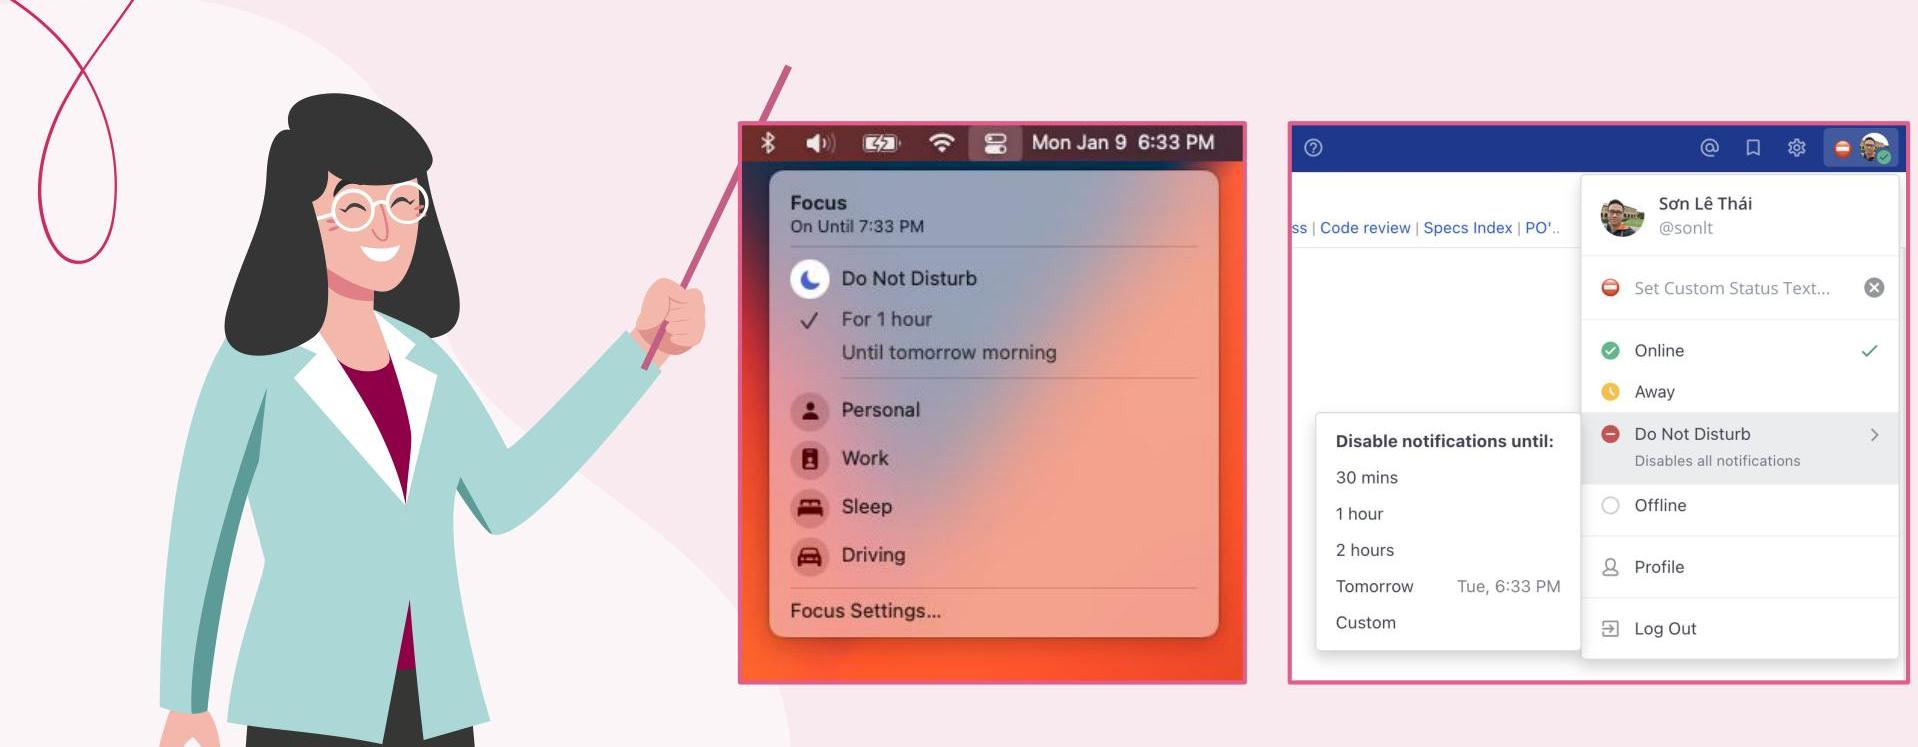

In [32]:
from PIL import Image

image = Image.open(image_path)
image